In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
cities=pd.read_csv("/content/dim_cities.csv")
respondent=pd.read_csv("/content/dim_repondents.csv")
survey_responses=pd.read_csv("/content/fact_survey_responses.csv")

In [ ]:
cities

City_ID       City    Tier
0   CT111      Delhi  Tier 1
1   CT112     Mumbai  Tier 1
2   CT113  Bangalore  Tier 1
3   CT114    Chennai  Tier 1
4   CT115    Kolkata  Tier 2
5   CT116  Hyderabad  Tier 1
6   CT117  Ahmedabad  Tier 2
7   CT118       Pune  Tier 2
8   CT119     Jaipur  Tier 2
9   CT120    Lucknow  Tier 2

In [ ]:
respondent.head()

Respondent_ID            Name    Age  Gender City_ID
0         120031  Aniruddh Issac  15-18  Female   CT117
1         120032     Trisha Rout  19-30    Male   CT118
2         120033    Yuvraj  Virk  15-18    Male   CT116
3         120034    Pranay Chand  31-45  Female   CT113
4         120035  Mohanlal Joshi  19-30  Female   CT120

In [ ]:
respondent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [ ]:
survey_responses.head()

Response_ID  Respondent_ID  Consume_frequency  \
0       103001         120031   2-3 times a week   
1       103002         120032  2-3 times a month   
2       103003         120033             Rarely   
3       103004         120034   2-3 times a week   
4       103005         120035              Daily   

                      Consume_time              Consume_reason Heard_before  \
0  To stay awake during work/study  Increased energy and focus          Yes   
1               Throughout the day        To boost performance           No   
2                  Before exercise  Increased energy and focus           No   
3  To stay awake during work/study        To boost performance           No   
4  To stay awake during work/study  Increased energy and focus          Yes   

  Brand_perception General_perception Tried_before  Taste_experience  ...  \
0          Neutral           Not sure           No                 5  ...   
1          Neutral           Not sure           No                 5  ...   
2          Neutral           Not sure           No                 2  ...   
3         Positive          Dangerous          Yes                 5  ...   
4          Neutral          Effective          Yes                 5  ...   

       Improvements_desired Ingredients_expected Health_concerns  \
0     Reduced sugar content              Guarana              No   
1  More natural ingredients             Caffeine             Yes   
2  More natural ingredients             Caffeine              No   
3                     Other             Caffeine              No   
4  More natural ingredients             Caffeine             Yes   

  Interest_in_natural_or_organic Marketing_channels  \
0                            Yes     TV commercials   
1                       Not Sure        Print media   
2                            Yes         Online ads   
3                            Yes         Online ads   
4                            Yes         Online ads   

        Packaging_preference Limited_edition_packaging Price_range  \
0  Compact and portable cans                       Yes       50-99   
1  Compact and portable cans                        No       50-99   
2   Innovative bottle design                  Not Sure     100-150   
3  Compact and portable cans                        No   Above 150   
4  Compact and portable cans                       Yes     100-150   

  Purchase_location Typical_consumption_situations  
0      Supermarkets          Studying/working late  
1      Supermarkets                Sports/exercise  
2      Supermarkets          Studying/working late  
3      Supermarkets                Sports/exercise  
4  Online retailers          Studying/working late  

[5 rows x 23 columns]

In [ ]:
survey_responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [ ]:
survey_responses.describe()

Response_ID  Respondent_ID  Taste_experience
count   10000.00000    10000.00000      10000.000000
mean   108000.50000   125030.50000          3.281900
std      2886.89568     2886.89568          1.239752
min    103001.00000   120031.00000          1.000000
25%    105500.75000   122530.75000          2.000000
50%    108000.50000   125030.50000          3.000000
75%    110500.25000   127530.25000          4.000000
max    113000.00000   130030.00000          5.000000

In [ ]:
df=respondent.merge(survey_responses,on="Respondent_ID")
df.head()

Respondent_ID            Name    Age  Gender City_ID  Response_ID  \
0         120031  Aniruddh Issac  15-18  Female   CT117       103001   
1         120032     Trisha Rout  19-30    Male   CT118       103002   
2         120033    Yuvraj  Virk  15-18    Male   CT116       103003   
3         120034    Pranay Chand  31-45  Female   CT113       103004   
4         120035  Mohanlal Joshi  19-30  Female   CT120       103005   

   Consume_frequency                     Consume_time  \
0   2-3 times a week  To stay awake during work/study   
1  2-3 times a month               Throughout the day   
2             Rarely                  Before exercise   
3   2-3 times a week  To stay awake during work/study   
4              Daily  To stay awake during work/study   

               Consume_reason Heard_before  ...      Improvements_desired  \
0  Increased energy and focus          Yes  ...     Reduced sugar content   
1        To boost performance           No  ...  More natural ingredients   
2  Increased energy and focus           No  ...  More natural ingredients   
3        To boost performance           No  ...                     Other   
4  Increased energy and focus          Yes  ...  More natural ingredients   

  Ingredients_expected Health_concerns  Interest_in_natural_or_organic  \
0              Guarana              No                             Yes   
1             Caffeine             Yes                        Not Sure   
2             Caffeine              No                             Yes   
3             Caffeine              No                             Yes   
4             Caffeine             Yes                             Yes   

  Marketing_channels       Packaging_preference Limited_edition_packaging  \
0     TV commercials  Compact and portable cans                       Yes   
1        Print media  Compact and portable cans                        No   
2         Online ads   Innovative bottle design                  Not Sure   
3         Online ads  Compact and portable cans                        No   
4         Online ads  Compact and portable cans                       Yes   

  Price_range Purchase_location Typical_consumption_situations  
0       50-99      Supermarkets          Studying/working late  
1       50-99      Supermarkets                Sports/exercise  
2     100-150      Supermarkets          Studying/working late  
3   Above 150      Supermarkets                Sports/exercise  
4     100-150  Online retailers          Studying/working late  

[5 rows x 27 columns]

In [ ]:
df1=df.merge(cities,on="City_ID",how="right")
df1.head()

Respondent_ID          Name    Age      Gender City_ID  Response_ID  \
0         120094  Armaan Bassi  31-45  Non-binary   CT111       103064   
1         120120   Kiaan Uppal  19-30      Female   CT111       103090   
2         120162  Hazel Chanda    65+  Non-binary   CT111       103132   
3         120202    Stuvan Som  19-30      Female   CT111       103172   
4         120217   Adira Raman  31-45      Female   CT111       103187   

   Consume_frequency                     Consume_time  \
0  2-3 times a month  To stay awake during work/study   
1   2-3 times a week  To stay awake during work/study   
2             Rarely                  Before exercise   
3   2-3 times a week                  Before exercise   
4              Daily  To stay awake during work/study   

               Consume_reason Heard_before  ... Health_concerns  \
0  Increased energy and focus          Yes  ...             Yes   
1  Increased energy and focus           No  ...             Yes   
2           To combat fatigue          Yes  ...              No   
3  Increased energy and focus           No  ...              No   
4           To combat fatigue           No  ...              No   

  Interest_in_natural_or_organic Marketing_channels  \
0                            Yes     TV commercials   
1                            Yes     TV commercials   
2                            Yes     TV commercials   
3                             No              Other   
4                            Yes     TV commercials   

        Packaging_preference Limited_edition_packaging Price_range  \
0  Compact and portable cans                        No       50-99   
1                      Other                       Yes       50-99   
2  Compact and portable cans                        No     100-150   
3  Compact and portable cans                       Yes   Above 150   
4      Collectible packaging                       Yes    Below 50   

          Purchase_location Typical_consumption_situations   City    Tier  
0  Gyms and fitness centers                Sports/exercise  Delhi  Tier 1  
1              Supermarkets         Social outings/parties  Delhi  Tier 1  
2              Local stores                Sports/exercise  Delhi  Tier 1  
3          Online retailers         Social outings/parties  Delhi  Tier 1  
4          Online retailers         Social outings/parties  Delhi  Tier 1  

[5 rows x 29 columns]

## Demographic Insights
1. who prefer energy drink more?
-  male prefer energy drink more compare to female and Non-binary.
2. which age group prefer enery drinks more?
- 19-30 and 31-45 age group which covers almost 78% of total people meanwhile if we cover youth which 15-18 also covers 15% means age between 15-30 covers  70% which is also good
3. Which type of marketing reaches the most youth(15-30)?
- online ads are the type of marketing reaches the youth which is about 48%.

<Axes: ylabel='Gender'>

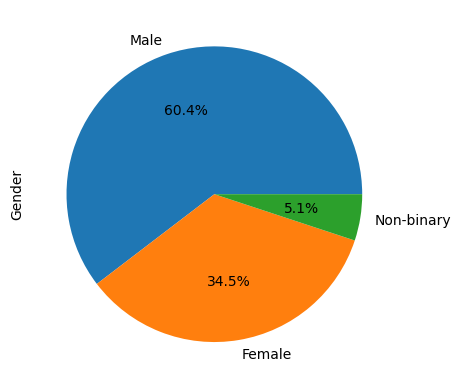

In [ ]:
respondent["Gender"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [ ]:
gender_age=df1.groupby(['Gender', 'Age'])['Response_ID'].count().unstack()
gender_age

Age         15-18  19-30  31-45  46-65  65+
Gender                                     
Female        516   1891    834    138   76
Male          903   3337   1435    261  102
Non-binary     69    292    107     27   12

In [ ]:
temp_df=df1["Age"].value_counts()
temp_df

19-30    5520
31-45    2376
15-18    1488
46-65     426
65+       190
Name: Age, dtype: int64

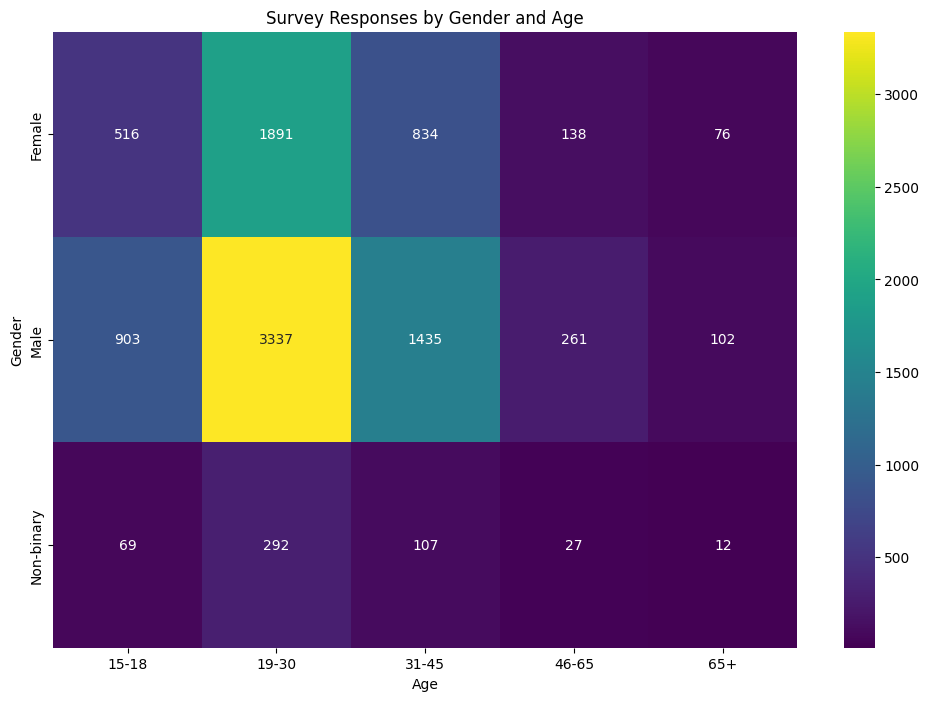

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(gender_age, annot=True, cmap='viridis',fmt="g")
plt.title('Survey Responses by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

Text(0, 0.5, 'Count')

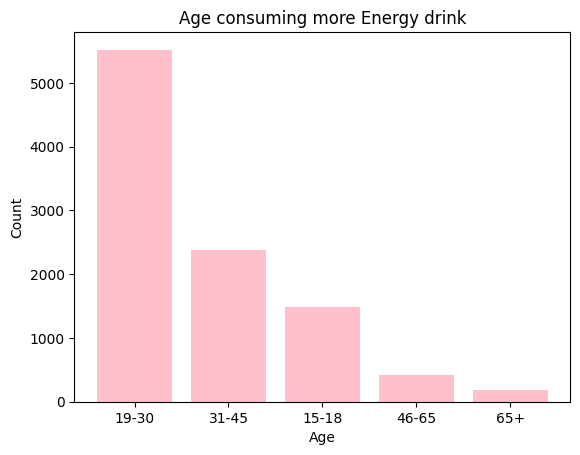

In [ ]:
plt.bar(temp_df.index,temp_df.values,color="pink")
plt.title("Age consuming more Energy drink")
plt.xlabel("Age")
plt.ylabel("Count")

<Axes: ylabel='Marketing_channels'>

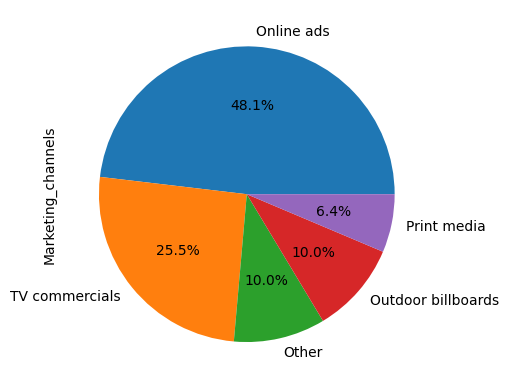

In [ ]:
pd.set_option('display.max_columns', None)
temp_df=df[(df["Age"]=="15-18") | (df["Age"]=="19-30")]
temp_df["Marketing_channels"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [ ]:
pd.crosstab(temp_df["Age"],temp_df["Marketing_channels"])

Marketing_channels  Online ads  Other  Outdoor billboards  Print media  \
Age                                                                      
15-18                      707     94                 117           75   
19-30                     2666    608                 585          371   

Marketing_channels  TV commercials  
Age                                 
15-18                          495  
19-30                         1290

In [ ]:
df["Age"].value_counts()

19-30    5520
31-45    2376
15-18    1488
46-65     426
65+       190
Name: Age, dtype: int64

#Consumer Preferences
1. what are the preferred ingredients of energy drinks among respondents?
- Caffeine is the ingredient which is prefered more by the people.
2. what packaging preferences do respondents have for enery drinks?
- compact and portable cans is most prefered type of packaging prefered by the citizens but at the same time innovative bottle design is also something which citizens prefered which is about 31% so we can even go with that or mixed of both.


Text(0.5, 1.0, 'Ingredients Preferences')

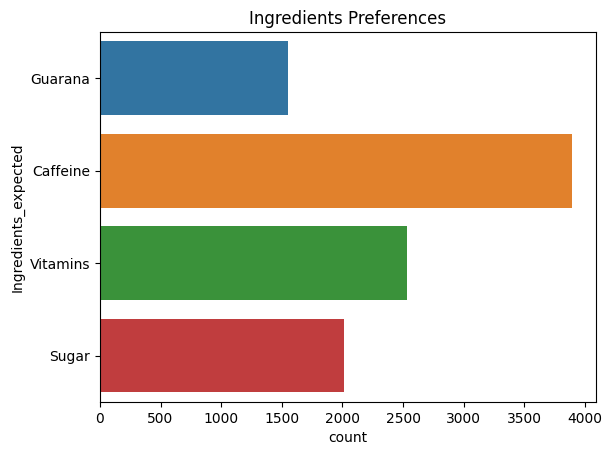

In [ ]:
sns.countplot(data=df,y="Ingredients_expected")
plt.title("Ingredients Preferences")

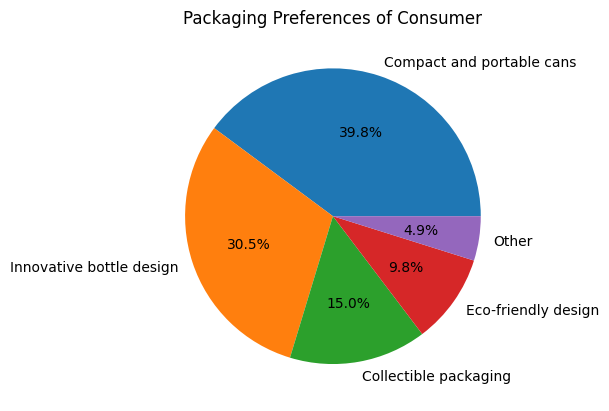

In [ ]:
temp_df=df["Packaging_preference"].value_counts()
plt.pie(temp_df.values,labels=temp_df.index,autopct="%0.1f%%")
plt.title("Packaging Preferences of Consumer")
plt.show()

#Competition Analysis
1. Who are the current market leaders?
- cola-coka is the current market leader with 26% followed by Bepsi which is 21%.
2. What are the primary reasons consumers prefer those brands over ours?
- brand_reputation is the primary reason because of which consumers are prefering other brand which is also true as cola-coka is a very big brand and is in the industry from many years.


In [ ]:
temp_df=survey_responses["Current_brands"].value_counts(normalize=True)*100
temp_df

Cola-Coka    25.38
Bepsi        21.12
Gangster     18.54
Blue Bull    10.58
CodeX         9.80
Sky 9         9.79
Others        4.79
Name: Current_brands, dtype: float64

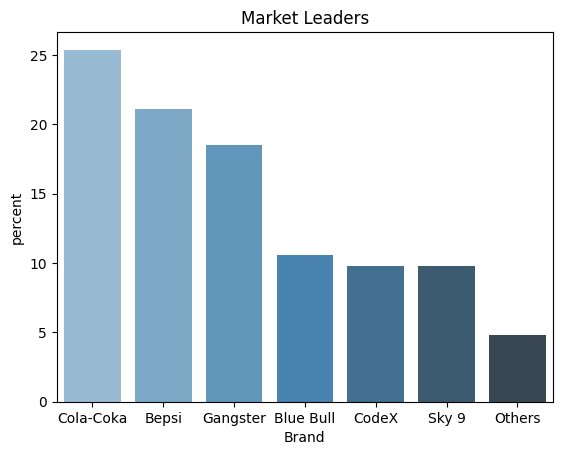

In [ ]:
sns.barplot(x=temp_df.index,y=temp_df.values,palette="Blues_d")
plt.title("Market Leaders")
plt.xlabel("Brand")
plt.ylabel("percent")
plt.show()

In [ ]:
#Reason for choosing other brand in general
temp_df=survey_responses["Reasons_for_choosing_brands"].value_counts()
temp_df

Brand reputation           2652
Taste/flavor preference    2011
Availability               1910
Effectiveness              1748
Other                      1679
Name: Reasons_for_choosing_brands, dtype: int64

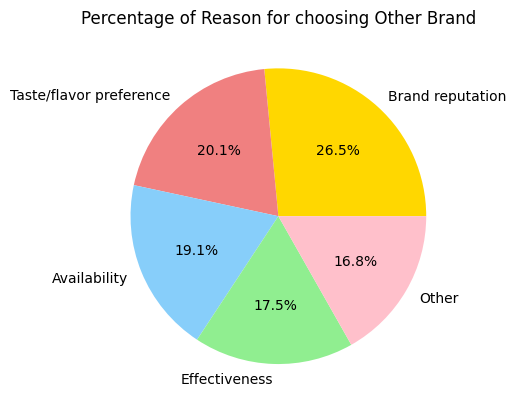

In [ ]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen',"pink"]
plt.pie(temp_df.values,labels=temp_df.index,autopct="%0.1f%%",colors=colors)
plt.title("Percentage of Reason for choosing Other Brand")
plt.show()

In [ ]:
#Reason for choosing other brand comparing from our target market leaders.
temp_df=df1.groupby(["Reasons_for_choosing_brands","Current_brands"])["Respondent_ID"].count().unstack()
temp_df

Current_brands               Bepsi  Blue Bull  CodeX  Cola-Coka  Gangster  \
Reasons_for_choosing_brands                                                 
Availability                   418        180    195        510       339   
Brand reputation               577        289    259        616       511   
Effectiveness                  339        187    176        433       338   
Other                          355        165    168        448       309   
Taste/flavor preference        423        237    182        531       357   

Current_brands               Others  Sky 9  
Reasons_for_choosing_brands                 
Availability                     86    182  
Brand reputation                140    260  
Effectiveness                    87    188  
Other                            79    155  
Taste/flavor preference          87    194

Text(0.5, 1.0, 'Reason for choosing other brand comparing from our target market leaders')

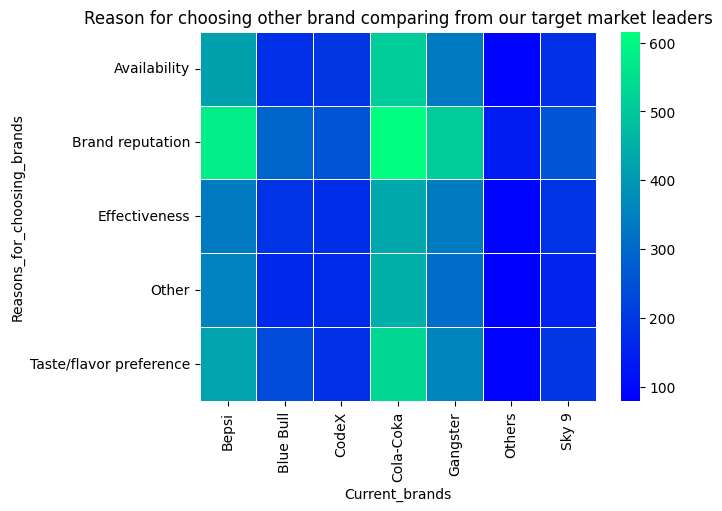

In [ ]:
sns.heatmap(temp_df,cmap="winter",linewidth=0.5)
plt.title("Reason for choosing other brand comparing from our target market leaders")

# Marketing Channels and Brand Awareness:
1. Which marketing channel can be used to reach more customers?
- online ads as told earlier
2. How effective are different marketing strategies and channels in reaching our
customers?
- online ads and TV commercials are two most marketing channels effective in general ,to know which marketing channel if more effective for our brand we need to filter data on people hwo heard before about our brand that is also online ads and tv commercials only. so we can use these two for our brand awareness.

In [ ]:
survey_responses["Marketing_channels"].value_counts().reset_index()

index  Marketing_channels
0          Online ads                4020
1      TV commercials                2688
2  Outdoor billboards                1226
3               Other                1225
4         Print media                 841

In [ ]:
#filtering people who heard before of our brand select which marketing channels this will be more effective.
temp_df1=survey_responses[survey_responses['Heard_before']=="Yes"].groupby("Marketing_channels").size().reset_index(name="Count")
temp_df1

Marketing_channels  Count
0          Online ads   1805
1               Other    490
2  Outdoor billboards    524
3         Print media    371
4      TV commercials   1257

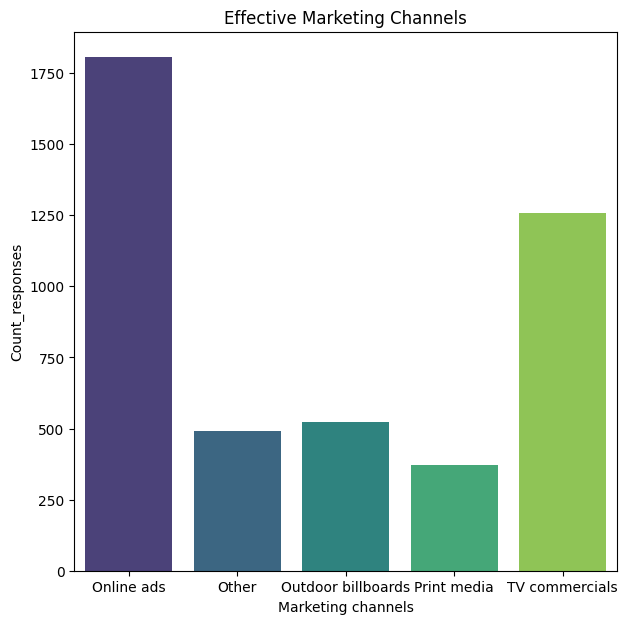

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(data=temp_df1,x="Marketing_channels",y="Count",palette="viridis")
plt.title("Effective Marketing Channels")
plt.xlabel("Marketing channels")
plt.ylabel("Count_responses")
plt.show()


#Brand Penetration:
1. What do people think about our brand? (overall rating)
- about 70% of people think that our brand is average,good,excellent out which 30% is average and 25% us good,but also we need to turn the 30% of average to good or excellent.
2. Which cities do we need to focus more on?
- We need to focus more on tier 2 cities and from tier1 we nedd to focus on city delhi.

In [ ]:
#making a column Overall_rating for analysis
def overall_rating(value):
  if value==0:
    return np.nan
  else:
    if value==1:
      return "poor"
    elif value==2:
      return "below average"
    elif value==3:
      return "average"
    elif value==4:
      return "good"
    elif value==5:
      return "excellent"

In [ ]:
df1["overall_rating"]=df1["Taste_experience"].apply(overall_rating)

In [ ]:
# Filtering inconsistent responses
temp_df=df1[~((df1['Tried_before'] == 'No') & (df1['Taste_experience'] != 0))]


<Axes: ylabel='overall_rating'>

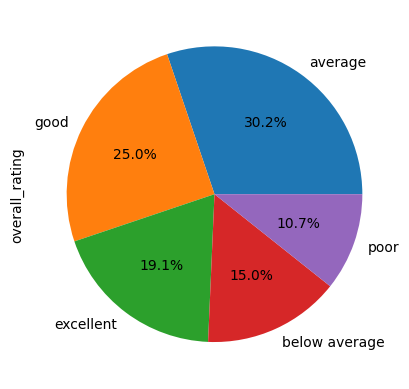

In [ ]:
temp_df["overall_rating"].value_counts().plot(kind="pie",autopct="%0.1f%%")

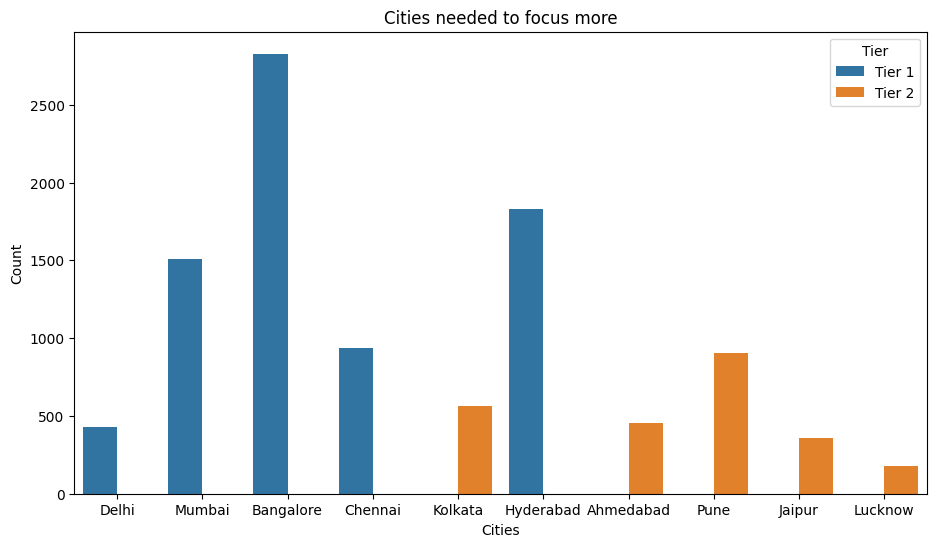

In [ ]:
plt.figure(figsize=(11,6))
sns.countplot(data=df1,x="City",hue="Tier")
plt.title("Cities needed to focus more")
plt.xlabel("Cities")
plt.ylabel("Count")
plt.show()


In [ ]:
temp_df=pd.crosstab(df1["City"],df1["Heard_before"])
temp_df

Heard_before    No   Yes
City                    
Ahmedabad      249   207
Bangalore     1670  1158
Chennai        565   372
Delhi          162   267
Hyderabad     1105   728
Jaipur         216   144
Kolkata        356   210
Lucknow         90    85
Mumbai         611   899
Pune           529   377

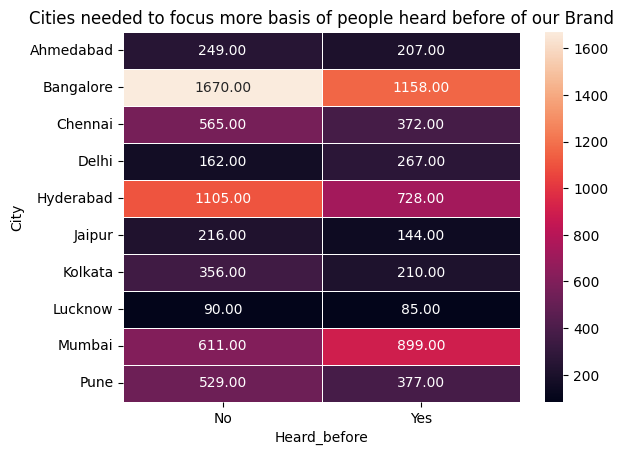

In [ ]:
sns.heatmap(temp_df,annot=True,linewidth=0.5,fmt=".2f")
plt.title("Cities needed to focus more basis of people heard before of our Brand")
plt.show()

In [ ]:
temp_df=pd.crosstab(df1["City"],df1["Tried_before"])
temp_df

Tried_before    No   Yes
City                    
Ahmedabad      289   167
Bangalore      844  1984
Chennai        270   667
Delhi          383    46
Hyderabad      562  1271
Jaipur         261    99
Kolkata        164   402
Lucknow        117    58
Mumbai        1363   147
Pune           866    40

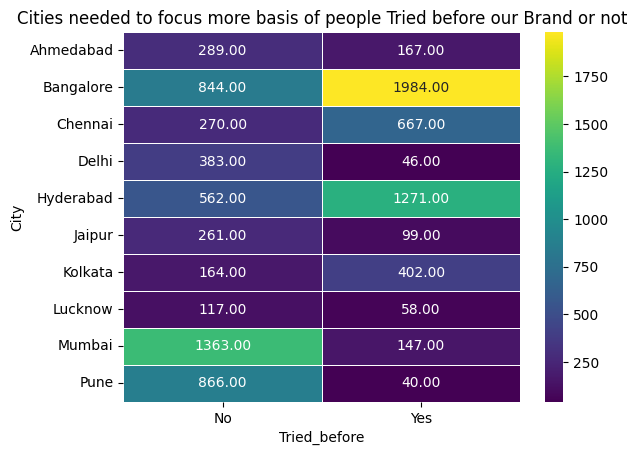

In [ ]:
sns.heatmap(temp_df,annot=True,linewidth=0.5,fmt=".2f",cmap="viridis")
plt.title("Cities needed to focus more basis of people Tried before our Brand or not")
plt.show()

#Purchase Behavior:
1. Where do respondents prefer to purchase energy drinks?
- respondents mostly prefer to purchase energy drink from supermarkets and online-retailers.
2. What are the typical consumption situations for energy drinks among
respondents?
- the typical situation to consume enery drink is before sports /exercise with around 50% and before study/working late.
3. What factors influence respondents' purchase decisions, such as price range and
limited edition packaging?
- about 73% of respondents prefer the price range  between 50-150 out of which 43% is between 50-99 and 31% prefer 100-150 so we can go anwhere middle of these both price range.
- coming to limited edition then mostly people does not prefer limited edition packaging,but at the same time little less than no some people do prefer yes also. so mostly price range  is something what influence more respondents for buying drink.





-- can take out more insights using gender,consume_time,consume_reason





In [ ]:
df1.head()

Respondent_ID          Name    Age      Gender City_ID  Response_ID  \
0         120094  Armaan Bassi  31-45  Non-binary   CT111       103064   
1         120120   Kiaan Uppal  19-30      Female   CT111       103090   
2         120162  Hazel Chanda    65+  Non-binary   CT111       103132   
3         120202    Stuvan Som  19-30      Female   CT111       103172   
4         120217   Adira Raman  31-45      Female   CT111       103187   

   Consume_frequency                     Consume_time  \
0  2-3 times a month  To stay awake during work/study   
1   2-3 times a week  To stay awake during work/study   
2             Rarely                  Before exercise   
3   2-3 times a week                  Before exercise   
4              Daily  To stay awake during work/study   

               Consume_reason Heard_before Brand_perception  \
0  Increased energy and focus          Yes          Neutral   
1  Increased energy and focus           No          Neutral   
2           To combat fatigue          Yes         Positive   
3  Increased energy and focus           No          Neutral   
4           To combat fatigue           No         Positive   

  General_perception Tried_before  Taste_experience  \
0          Dangerous           No                 2   
1           Not sure           No                 5   
2            Healthy           No                 1   
3           Not sure           No                 5   
4          Dangerous           No                 3   

         Reasons_preventing_trying Current_brands Reasons_for_choosing_brands  \
0                            Other      Blue Bull            Brand reputation   
1                  Health concerns         Others            Brand reputation   
2  Not interested in energy drinks       Gangster            Brand reputation   
3                  Health concerns      Cola-Coka                Availability   
4                  Health concerns      Cola-Coka               Effectiveness   

       Improvements_desired Ingredients_expected Health_concerns  \
0  More natural ingredients             Caffeine             Yes   
1     Reduced sugar content              Guarana             Yes   
2    Healthier alternatives             Vitamins              No   
3     Reduced sugar content                Sugar              No   
4                     Other                Sugar              No   

  Interest_in_natural_or_organic Marketing_channels  \
0                            Yes     TV commercials   
1                            Yes     TV commercials   
2                            Yes     TV commercials   
3                             No              Other   
4                            Yes     TV commercials   

        Packaging_preference Limited_edition_packaging Price_range  \
0  Compact and portable cans                        No       50-99   
1                      Other                       Yes       50-99   
2  Compact and portable cans                        No     100-150   
3  Compact and portable cans                       Yes   Above 150   
4      Collectible packaging                       Yes    Below 50   

          Purchase_location Typical_consumption_situations   City    Tier  
0  Gyms and fitness centers                Sports/exercise  Delhi  Tier 1  
1              Supermarkets         Social outings/parties  Delhi  Tier 1  
2              Local stores                Sports/exercise  Delhi  Tier 1  
3          Online retailers         Social outings/parties  Delhi  Tier 1  
4          Online retailers         Social outings/parties  Delhi  Tier 1

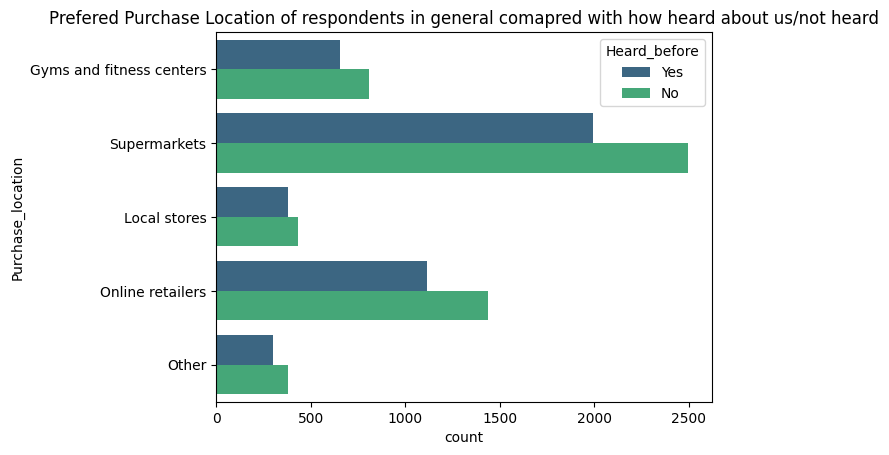

In [ ]:
#where do respondents prefer to purchase enery drinks?
sns.countplot(data=df1,y=df1["Purchase_location"],hue=df1["Heard_before"],palette="viridis")
plt.title("Prefered Purchase Location of respondents in general comapred with how heard about us/not heard")
plt.show()

In [ ]:
df1.head()

Respondent_ID          Name    Age      Gender City_ID  Response_ID  \
0         120094  Armaan Bassi  31-45  Non-binary   CT111       103064   
1         120120   Kiaan Uppal  19-30      Female   CT111       103090   
2         120162  Hazel Chanda    65+  Non-binary   CT111       103132   
3         120202    Stuvan Som  19-30      Female   CT111       103172   
4         120217   Adira Raman  31-45      Female   CT111       103187   

   Consume_frequency                     Consume_time  \
0  2-3 times a month  To stay awake during work/study   
1   2-3 times a week  To stay awake during work/study   
2             Rarely                  Before exercise   
3   2-3 times a week                  Before exercise   
4              Daily  To stay awake during work/study   

               Consume_reason Heard_before Brand_perception  \
0  Increased energy and focus          Yes          Neutral   
1  Increased energy and focus           No          Neutral   
2           To combat fatigue          Yes         Positive   
3  Increased energy and focus           No          Neutral   
4           To combat fatigue           No         Positive   

  General_perception Tried_before  Taste_experience  \
0          Dangerous           No                 2   
1           Not sure           No                 5   
2            Healthy           No                 1   
3           Not sure           No                 5   
4          Dangerous           No                 3   

         Reasons_preventing_trying Current_brands Reasons_for_choosing_brands  \
0                            Other      Blue Bull            Brand reputation   
1                  Health concerns         Others            Brand reputation   
2  Not interested in energy drinks       Gangster            Brand reputation   
3                  Health concerns      Cola-Coka                Availability   
4                  Health concerns      Cola-Coka               Effectiveness   

       Improvements_desired Ingredients_expected Health_concerns  \
0  More natural ingredients             Caffeine             Yes   
1     Reduced sugar content              Guarana             Yes   
2    Healthier alternatives             Vitamins              No   
3     Reduced sugar content                Sugar              No   
4                     Other                Sugar              No   

  Interest_in_natural_or_organic Marketing_channels  \
0                            Yes     TV commercials   
1                            Yes     TV commercials   
2                            Yes     TV commercials   
3                             No              Other   
4                            Yes     TV commercials   

        Packaging_preference Limited_edition_packaging Price_range  \
0  Compact and portable cans                        No       50-99   
1                      Other                       Yes       50-99   
2  Compact and portable cans                        No     100-150   
3  Compact and portable cans                       Yes   Above 150   
4      Collectible packaging                       Yes    Below 50   

          Purchase_location Typical_consumption_situations   City    Tier  
0  Gyms and fitness centers                Sports/exercise  Delhi  Tier 1  
1              Supermarkets         Social outings/parties  Delhi  Tier 1  
2              Local stores                Sports/exercise  Delhi  Tier 1  
3          Online retailers         Social outings/parties  Delhi  Tier 1  
4          Online retailers         Social outings/parties  Delhi  Tier 1

In [ ]:
#consumption situation of energy drink
temp_df=survey_responses["Typical_consumption_situations"].value_counts()
temp_df


Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: Typical_consumption_situations, dtype: int64

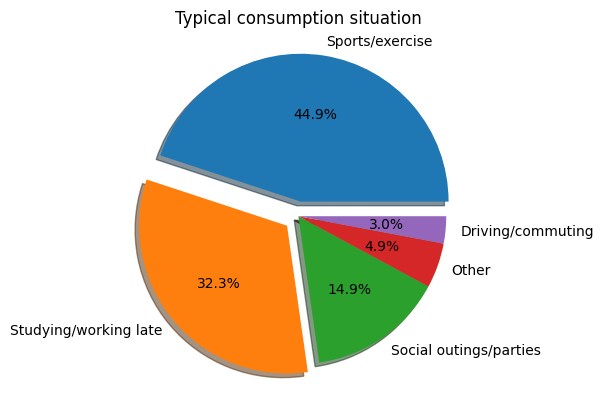

In [ ]:
plt.pie(temp_df.values,labels=temp_df.index,autopct="%0.1f%%",explode=[0.1,0.1,0,0,0],shadow=True)
plt.title("Typical consumption situation")
plt.show()

In [ ]:
temp_df=pd.crosstab(df1["Typical_consumption_situations"],df1["Consume_reason"])

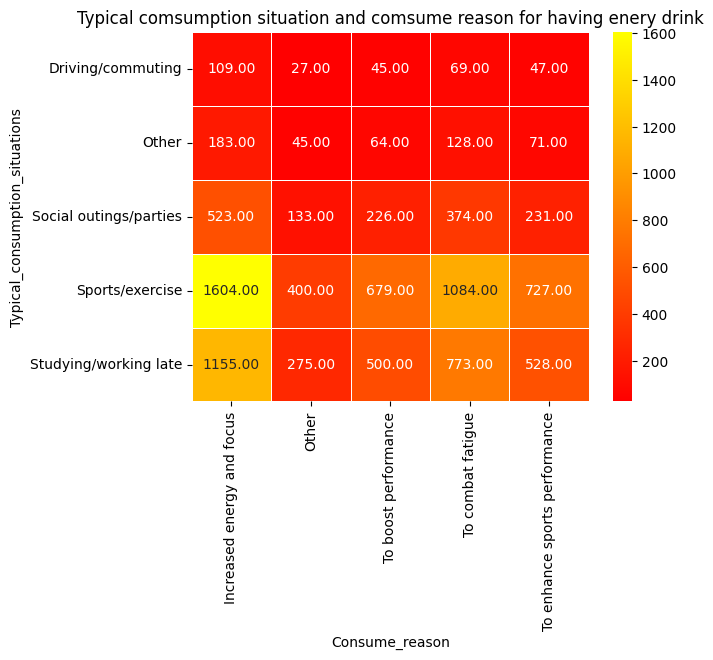

In [ ]:
sns.heatmap(data=temp_df,annot=True,linewidth=0.5,fmt=".2f",cmap="autumn")
plt.title("Typical comsumption situation and comsume reason for having enery drink")
plt.show()

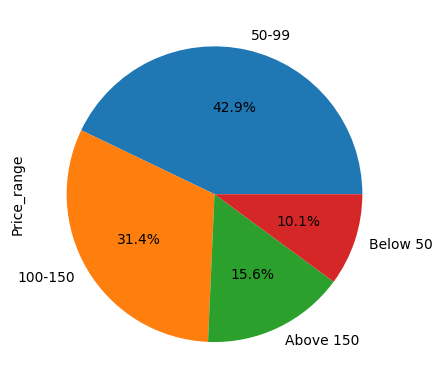

In [ ]:
#factors influencing people to buy enery drink like price range or limited edition packaging
df["Price_range"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.show()

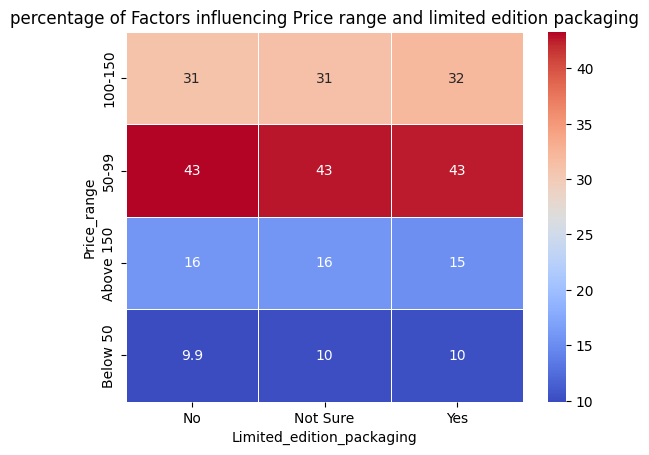

In [ ]:
temp_df=pd.crosstab(df["Price_range"],df["Limited_edition_packaging"],normalize="columns")*100
sns.heatmap(data=temp_df,annot=True,linewidth=0.5,cmap="coolwarm")
plt.title("percentage of Factors influencing Price range and limited edition packaging")
plt.show()

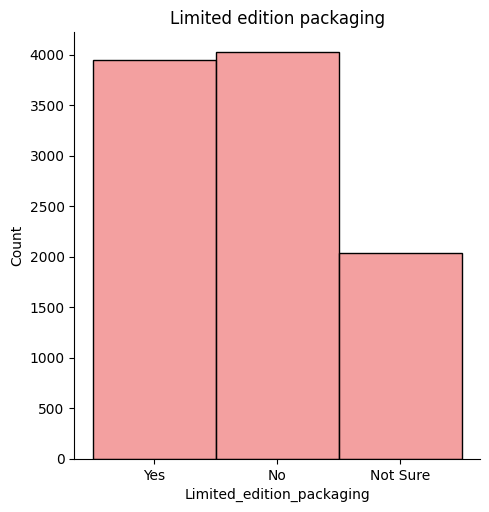

In [ ]:
sns.displot(data=survey_responses,kind="hist",x='Limited_edition_packaging',color="lightcoral")
plt.title("Limited edition packaging")
plt.show()

#Product Development
1. Which area of business should we focus more on our product development?
(Branding/taste/availability)
- Brand perception of respondents are more neutral than positive towards our brand and very less is negative so we need to convert this neutral to postive.
- we should focus more on availability beacuse after brand_reputation taste?flavour and availability is something due to which people prefer other drinks and as in cities which we got less response is anyway dependent on availability also .
- taste as the taste is average and good of more side  so meanwhlie it's good,
so need to work more on availability and brand awareness.



In [ ]:
# Creating a new DataFrame 'ProductDev' and dropping inconsistent responses
Product_develop = df1[~((df1['Tried_before'] == 'No') & (df1['Taste_experience'] != 0))]

# Checking for taste more than 1 standard deviation less than the mean
taste = Product_develop[Product_develop['Taste_experience'] < Product_develop['Taste_experience'].mean() - Product_develop['Taste_experience'].std()]

# Checking for 'Not available locally'
availability = Product_develop[Product_develop['Reasons_preventing_trying'] == 'Not available locally']

# Checking for negative branding
branding = Product_develop[(Product_develop['Brand_perception'] == 'Negative') | (Product_develop['Brand_perception'] == 'Neutral')]

# Counting the number of respondents for each focus area
focus_areas = {
    'Taste': len(taste),
    'Availability': len(availability),
    'Branding': len(branding)
}

focus_areas

{'Taste': 1254, 'Availability': 1266, 'Branding': 3879}

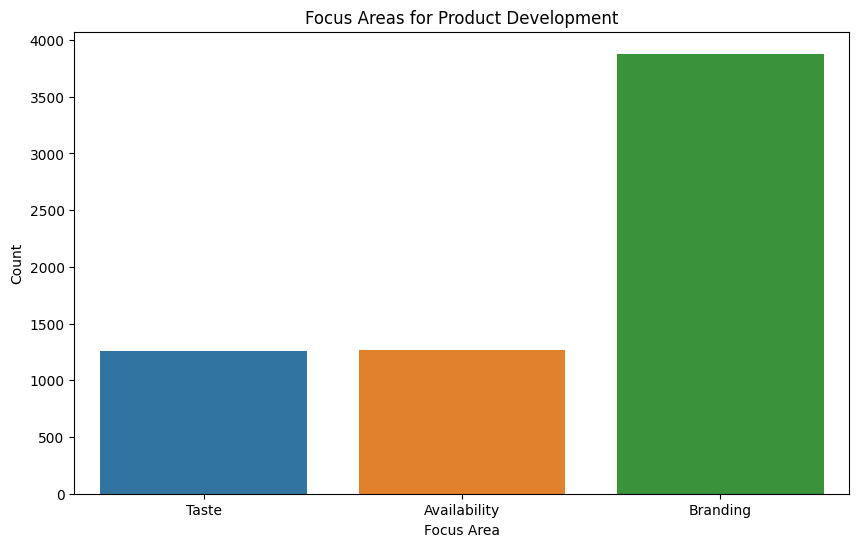

In [ ]:
# Create a DataFrame for visualization
focus_areas_df = pd.DataFrame({
    'Focus Area': list(focus_areas.keys()),
    'Count': list(focus_areas.values())
})

# Plotting the focus areas
plt.figure(figsize=(10, 6))
sns.barplot(x='Focus Area', y='Count', data=focus_areas_df)
plt.title('Focus Areas for Product Development')
plt.ylabel('Count')
plt.show()

In [ ]:
df1.head()

Respondent_ID          Name    Age      Gender City_ID  Response_ID  \
0         120094  Armaan Bassi  31-45  Non-binary   CT111       103064   
1         120120   Kiaan Uppal  19-30      Female   CT111       103090   
2         120162  Hazel Chanda    65+  Non-binary   CT111       103132   
3         120202    Stuvan Som  19-30      Female   CT111       103172   
4         120217   Adira Raman  31-45      Female   CT111       103187   

   Consume_frequency                     Consume_time  \
0  2-3 times a month  To stay awake during work/study   
1   2-3 times a week  To stay awake during work/study   
2             Rarely                  Before exercise   
3   2-3 times a week                  Before exercise   
4              Daily  To stay awake during work/study   

               Consume_reason Heard_before Brand_perception  \
0  Increased energy and focus          Yes          Neutral   
1  Increased energy and focus           No          Neutral   
2           To combat fatigue          Yes         Positive   
3  Increased energy and focus           No          Neutral   
4           To combat fatigue           No         Positive   

  General_perception Tried_before  Taste_experience  \
0          Dangerous           No                 2   
1           Not sure           No                 5   
2            Healthy           No                 1   
3           Not sure           No                 5   
4          Dangerous           No                 3   

         Reasons_preventing_trying Current_brands Reasons_for_choosing_brands  \
0                            Other      Blue Bull            Brand reputation   
1                  Health concerns         Others            Brand reputation   
2  Not interested in energy drinks       Gangster            Brand reputation   
3                  Health concerns      Cola-Coka                Availability   
4                  Health concerns      Cola-Coka               Effectiveness   

       Improvements_desired Ingredients_expected Health_concerns  \
0  More natural ingredients             Caffeine             Yes   
1     Reduced sugar content              Guarana             Yes   
2    Healthier alternatives             Vitamins              No   
3     Reduced sugar content                Sugar              No   
4                     Other                Sugar              No   

  Interest_in_natural_or_organic Marketing_channels  \
0                            Yes     TV commercials   
1                            Yes     TV commercials   
2                            Yes     TV commercials   
3                             No              Other   
4                            Yes     TV commercials   

        Packaging_preference Limited_edition_packaging Price_range  \
0  Compact and portable cans                        No       50-99   
1                      Other                       Yes       50-99   
2  Compact and portable cans                        No     100-150   
3  Compact and portable cans                       Yes   Above 150   
4      Collectible packaging                       Yes    Below 50   

          Purchase_location Typical_consumption_situations   City    Tier  \
0  Gyms and fitness centers                Sports/exercise  Delhi  Tier 1   
1              Supermarkets         Social outings/parties  Delhi  Tier 1   
2              Local stores                Sports/exercise  Delhi  Tier 1   
3          Online retailers         Social outings/parties  Delhi  Tier 1   
4          Online retailers         Social outings/parties  Delhi  Tier 1   

  overall_rating  
0  below average  
1      excellent  
2           poor  
3      excellent  
4        average

#What immediate improvements can we bring to the product?
-- we can work on brand_awareness and availability mainly we can also work on adding healthy and natural ingredients as most citizens prefer it as it is effective and they are health concerned,
- What should be the ideal price of our product?
-- the ideal price should be between 50-150 as shown earlier.
- What kind of marketing campaigns, offers, and discounts we can run?
-- we should work on online ads,social media marketing,influencer marketing as
 they are cheap and help us gain cutomer base our most of the respondents are youth and they nowadays they are mostly engaged with online platforms.
- offers what we can give is like we they buy 5 cans they get 15% dicount,we can also provide them coupon codes , or referal discount (as if they refer their friends or family then they get some 10% discount on next puchase or small gift voucher ),this way we can gain the customer base also and aware people about our brand.
- Who can be a brand ambassador, and why?
we can choose our brand ambassador someone from sport/exercise expert  as they
 their rate is higher than other so we can choose actress shilpa shetty or sports person like Neraj chopra. as they are more  fitness enthusiast.
- Who should be our target audience, and why?
-- our target audience should be people of age between 15-45, mainly male and female especially gym/sports/exercise people and also study or working people.
- we should also make it available locally as our drink is not available locally so people are not trying it. and the location can be mainly supermarkets as those who have not heard about our brand mostly buy from supermarkets.
- we can also add ingredients like caffiene or some natural ingredients as people who are health concerned prefer natural/organic ingredient also people whoc heard about us which is 43%  is more health concerned .
and also desire less sugar content.
  



In [ ]:
# Grouping the data by 'Gender' and 'Age' and calculating the consume frequency count
#Target audience
gender_age_consume = df1.groupby(['Gender', 'Age'])['Consume_frequency'].value_counts().unstack().fillna(0)

gender_age_consume

Consume_frequency  2-3 times a month  2-3 times a week  Daily  Once a week  \
Gender     Age                                                               
Female     15-18                  74               198     57           78   
           19-30                 301               652    272          311   
           31-45                 144               292    112          125   
           46-65                  19                48     16           33   
           65+                    11                27      9           14   
Male       15-18                 147               312    131          156   
           19-30                 531              1159    431          533   
           31-45                 236               488    217          221   
           46-65                  41                95     25           48   
           65+                    13                40     13           15   
Non-binary 15-18                  11                29      8           10   
           19-30                  59               106     33           44   
           31-45                  18                29     19           15   
           46-65                   6                12      1            5   
           65+                     2                 4      2            1   

Consume_frequency  Rarely  
Gender     Age             
Female     15-18      109  
           19-30      355  
           31-45      161  
           46-65       22  
           65+         15  
Male       15-18      157  
           19-30      683  
           31-45      273  
           46-65       52  
           65+         21  
Non-binary 15-18       11  
           19-30       50  
           31-45       26  
           46-65        3  
           65+          3

In [ ]:
#What immediate improvements can we bring to the product?
pd.crosstab(df1["City"],df1["Reasons_preventing_trying"])

Reasons_preventing_trying  Health concerns  Not available locally  \
City                                                                
Ahmedabad                              109                     64   
Bangalore                              691                    709   
Chennai                                228                    231   
Delhi                                  108                     75   
Hyderabad                              460                    511   
Jaipur                                  20                    121   
Kolkata                                 22                    204   
Lucknow                                  7                     58   
Mumbai                                 374                    236   
Pune                                   239                    222   

Reasons_preventing_trying  Not interested in energy drinks  Other  \
City                                                                
Ahmedabad                                              160     18   
Bangalore                                              562    430   
Chennai                                                182    155   
Delhi                                                  114     25   
Hyderabad                                              345    253   
Jaipur                                                  68     60   
Kolkata                                                109     93   
Lucknow                                                 39     29   
Mumbai                                                 433     75   
Pune                                                   181    130   

Reasons_preventing_trying  Unfamiliar with the brand  
City                                                  
Ahmedabad                                        105  
Bangalore                                        436  
Chennai                                          141  
Delhi                                            107  
Hyderabad                                        264  
Jaipur                                            91  
Kolkata                                          138  
Lucknow                                           42  
Mumbai                                           392  
Pune                                             134

In [ ]:
#What immediate improvements can we bring to the product?
pd.crosstab(df1["Health_concerns"],df1["Interest_in_natural_or_organic"])

Interest_in_natural_or_organic    No  Not Sure   Yes
Health_concerns                                     
No                              1239       778  1938
Yes                             1823      1177  3045

In [ ]:
df1["Improvements_desired"].value_counts()


Reduced sugar content       2995
More natural ingredients    2498
Wider range of flavors      2037
Healthier alternatives      1472
Other                        998
Name: Improvements_desired, dtype: int64

<Axes: ylabel='Price_range'>

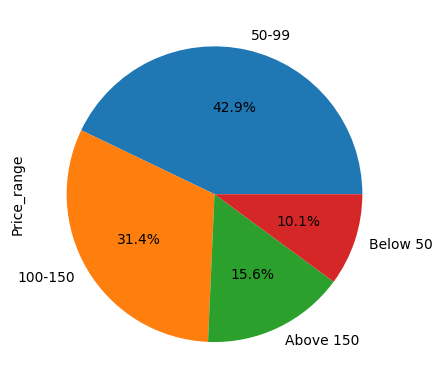

In [ ]:
#ideal price of the product
df1["Price_range"].value_counts().plot(kind="pie",autopct="%0.1f%%")